In [13]:
# -*-coding:utf-8-*-

import numbers
import numpy as np
import scipy as sp
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn
from sklearn import metrics

y = np.array([0, 0, 1, 1])
y_pred = np.array([0.1, 0.5, 0.3, 0.8])
fpr, tpr, thresholds = metrics.roc_curve(y, y_pred)
fpr = np.insert(fpr, 0, 0)
tpr = np.insert(tpr, 0, 0)
print(fpr)
print(tpr)
print(thresholds)
auc = metrics.auc(fpr, tpr)
print(metrics.roc_auc_score(y, y_pred))

[ 0.   0.   0.5  0.5  1. ]
[ 0.   0.5  0.5  1.   1. ]
[ 0.8  0.5  0.3  0.1]
0.75


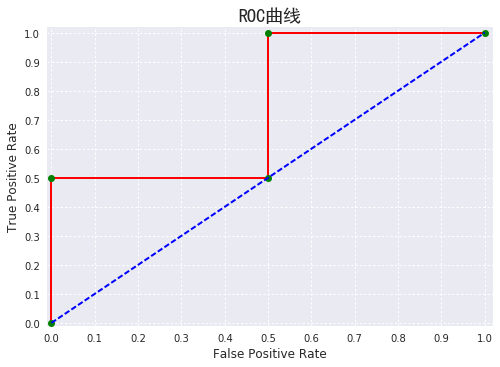

In [14]:
from matplotlib.font_manager import FontProperties
font_set = FontProperties(fname='../fonts/simhei.ttf', size=15)
fontproperties=font_set
mpl.rcParams['font.sans-serif'] = [u'SimHei']
mpl.rcParams['axes.unicode_minus'] = False
plt.figure(facecolor='w')
plt.plot(fpr, tpr, marker='o', lw=2, ls='-', mfc='g', mec='g', color='r')
plt.plot([0, 1], [0, 1], lw=2, ls='--', c='b')
plt.xlim((-0.01, 1.02))
plt.ylim((-0.01, 1.02))
plt.xticks(np.arange(0, 1.1, 0.1))
plt.yticks(np.arange(0, 1.1, 0.1))
plt.xlabel('False Positive Rate', fontsize=12)
plt.ylabel('True Positive Rate', fontsize=12)
plt.grid(b=True, ls='dotted')
plt.title(u'ROC曲线', fontsize=18, fontproperties=fontproperties)
plt.show()

[ 0.768       0.7572      0.78985     0.7729      0.77523333]
Macro AUC: 0.771683333333


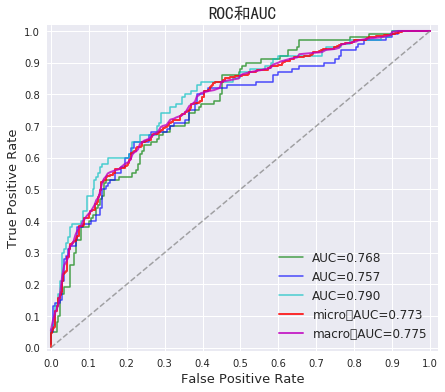

In [15]:
import numbers
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.svm import SVC
from sklearn.preprocessing import label_binarize
from numpy import interp
from sklearn import metrics
from itertools import cycle

np.random.seed(0)
pd.set_option('display.width', 300)
np.set_printoptions(suppress=True)
n = 300
x = np.random.randn(n, 50)
y = np.array([0] * 100 + [1] * 100 + [2] * 100)
n_class = 3

alpha = np.logspace(-3, 3, 7)
clf = LogisticRegression(penalty='l2', C=1)
clf.fit(x, y)
y_score = clf.decision_function(x)
y = label_binarize(y, classes=np.arange(n_class))
colors = cycle('gbc')
fpr = dict()
tpr = dict()
auc = np.empty(n_class + 2)
mpl.rcParams['font.sans-serif'] = u'SimHei'
mpl.rcParams['axes.unicode_minus'] = False
plt.figure(figsize=(7, 6), facecolor='w')
for i, color in zip(np.arange(n_class), colors):
    fpr[i], tpr[i], thresholds = metrics.roc_curve(y[:, i], y_score[:, i])
    auc[i] = metrics.auc(fpr[i], tpr[i])
    plt.plot(fpr[i], tpr[i], c=color, lw=1.5, alpha=0.7, label=u'AUC=%.3f' % auc[i])
# micro
fpr['micro'], tpr['micro'], thresholds = metrics.roc_curve(y.ravel(), y_score.ravel())
auc[n_class] = metrics.auc(fpr['micro'], tpr['micro'])
plt.plot(fpr['micro'], tpr['micro'], c='r', lw=2, ls='-', alpha=0.8, label=u'micro，AUC=%.3f' % auc[n_class])
# macro
fpr['macro'] = np.unique(np.concatenate([fpr[i] for i in np.arange(n_class)]))
tpr_ = np.zeros_like(fpr['macro'])
for i in np.arange(n_class):
    tpr_ += interp(fpr['macro'], fpr[i], tpr[i])
tpr_ /= n_class
tpr['macro'] = tpr_
auc[n_class + 1] = metrics.auc(fpr['macro'], tpr['macro'])
print auc
print 'Macro AUC:', metrics.roc_auc_score(y, y_score, average='macro')
plt.plot(fpr['macro'], tpr['macro'], c='m', lw=2, alpha=0.8, label=u'macro，AUC=%.3f' % auc[n_class + 1])
plt.plot((0, 1), (0, 1), c='#808080', lw=1.5, ls='--', alpha=0.7)
plt.xlim((-0.01, 1.02))
plt.ylim((-0.01, 1.02))
plt.xticks(np.arange(0, 1.1, 0.1))
plt.yticks(np.arange(0, 1.1, 0.1))
plt.xlabel('False Positive Rate', fontsize=13)
plt.ylabel('True Positive Rate', fontsize=13)
plt.grid(b=True)
# plt.legend(loc='lower right', fancybox=True, framealpha=0.8, fontsize=12)
plt.legend(loc='lower right', fancybox=True, framealpha=0.8, edgecolor='#303030', fontsize=12)
plt.title(u'ROC和AUC', fontsize=17, fontproperties=fontproperties)
plt.show()